### Preamble and Imports

* This notebook is modified notebooks originally developed in [Pankaj Mehta's ML for physics course](http://physics.bu.edu/~pankajm/PY580.html), although I've added some modification based on [Volodymyr Kuleshov's applied ML course](https://github.com/kuleshov/cornell-cs5785-2022-applied-ml)*

Bayesian Linear Regression extends traditional linear regression by treating model parameters as probability distributions rather than point estimates. This approach provides several benefits:

1. Quantification of uncertainty in parameter estimates
2. Natural incorporation of prior knowledge
3. Ability to update beliefs as new data arrives

## Mathematical Background

The Bayesian Linear Regression model can be expressed as:

$y = \beta_0 + \beta_1 x + \epsilon$

where:
- $y$ is the target variable
- $x$ is the input feature
- $\beta_0$ and $\beta_1$ are the model parameters (intercept and slope)
- $\epsilon$ is Gaussian noise: $\epsilon \approx N(0, \sigma^2)$

In the Bayesian framework, we specify:
- Prior distributions for $\beta_0$ and $\beta_1$
- Likelihood function $p(y|x, \beta_0, \beta_1)$
- Posterior distribution $p(\beta_0, \beta_1|x, y)$

## Implementation

First, let's import the necessary libraries:

In [2]:
## Preamble / required packages
import numpy as np
import scipy.sparse as sp
import scipy.stats as stats
from scipy.stats import norm
np.random.seed(0)

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

import warnings
# Comment this out to activate warnings
warnings.filterwarnings('ignore')


# Bayesian methods



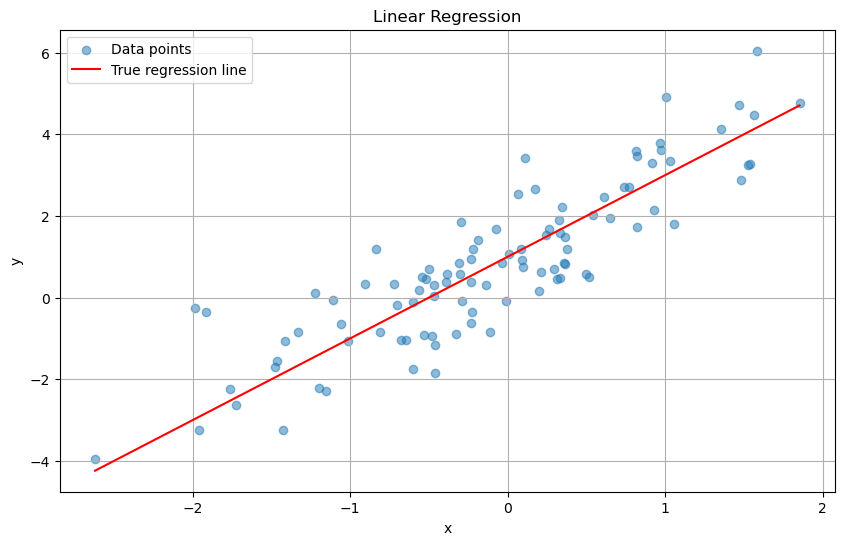


True parameters:
β0 = 1.000, β1 = 2.000

Posterior mean:
β0 = 1.006, β1 = 1.854

Posterior standard deviations:
σ_β0 = 0.101
σ_β1 = 0.111


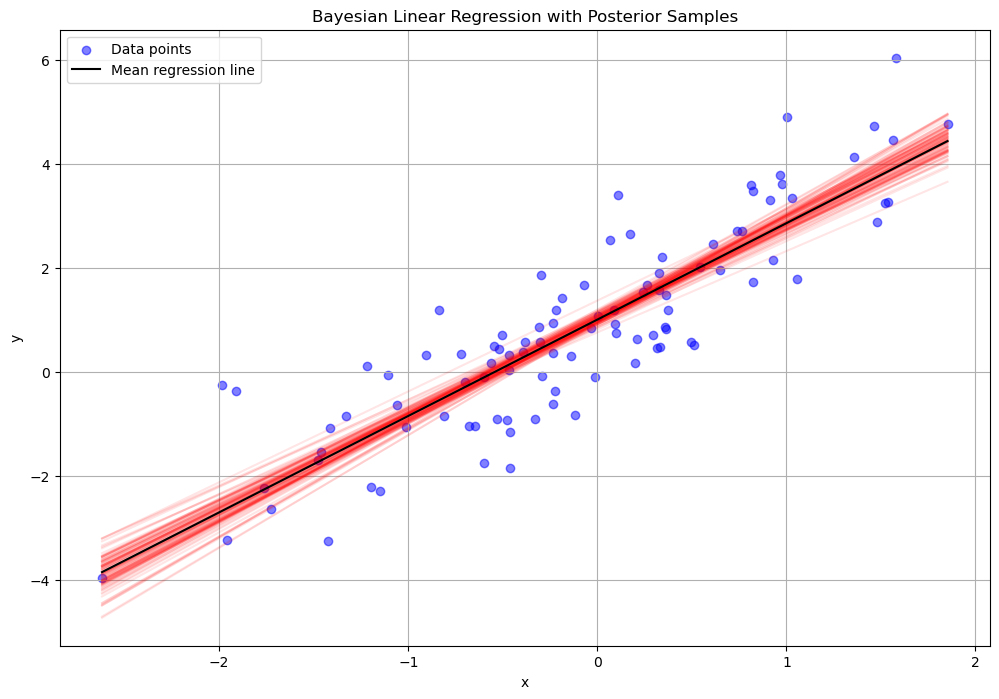

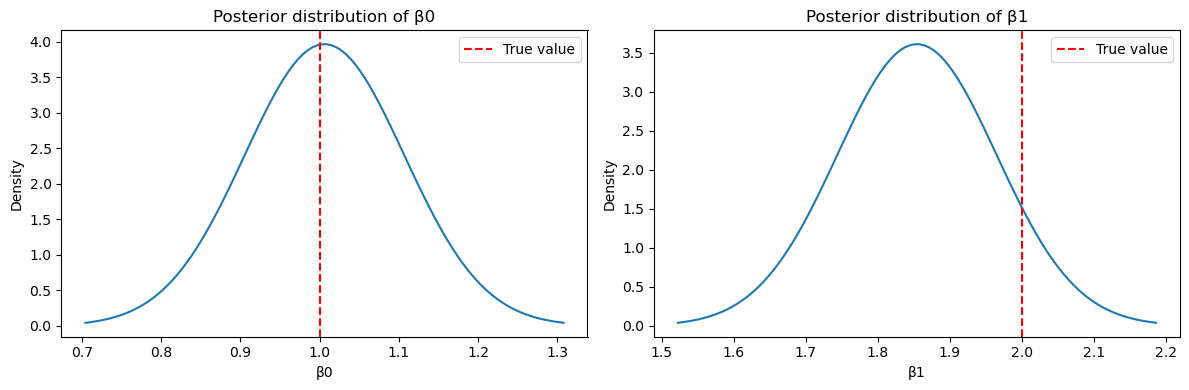

In [3]:

def generate_linear_data(n_samples=100, beta0=1, beta1=2, noise_std=1.0):
    """Generate synthetic data from a linear model with Gaussian noise."""
    np.random.seed(42)
    x = np.random.randn(n_samples)
    epsilon = np.random.normal(0, noise_std, n_samples)
    y = beta0 + beta1 * x + epsilon
    return x, y

def plot_data_and_fit(x, y, beta0, beta1, title="Linear Regression"):
    """Plot data points and regression line."""
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5, label='Data points')
    x_line = np.linspace(min(x), max(x), 100)
    y_line = beta0 + beta1 * x_line
    plt.plot(x_line, y_line, 'r-', label='True regression line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    return plt

def bayesian_linear_regression(x, y, prior_mean, prior_cov, noise_var=1.0):
    """
    Perform Bayesian linear regression.
    
    Parameters:
    -----------
    x : array-like
        Input features
    y : array-like
        Target values
    prior_mean : array-like
        Prior mean for parameters [β0, β1]
    prior_cov : array-like
        Prior covariance matrix for parameters
    noise_var : float
        Assumed noise variance σ²
    
    Returns:
    --------
    posterior_mean : array-like
        Posterior mean for parameters
    posterior_cov : array-like
        Posterior covariance matrix
    """
    # Design matrix
    X = np.column_stack([np.ones_like(x), x])
    
    # Posterior calculations using conjugate prior formulas
    posterior_cov = np.linalg.inv(
        np.linalg.inv(prior_cov) + 
        (1/noise_var) * X.T @ X
    )
    posterior_mean = posterior_cov @ (
        np.linalg.inv(prior_cov) @ prior_mean + 
        (1/noise_var) * X.T @ y
    )
    
    return posterior_mean, posterior_cov

def plot_posterior_samples(x, y, posterior_mean, posterior_cov, n_samples=100):
    """Plot data with posterior regression lines."""
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, alpha=0.5, color='blue', label='Data points')
    
    # Generate samples from the posterior
    beta_samples = np.random.multivariate_normal(
        posterior_mean, posterior_cov, n_samples
    )
    
    # Plot regression lines
    x_line = np.linspace(min(x), max(x), 100)
    for beta in beta_samples:
        y_line = beta[0] + beta[1] * x_line
        plt.plot(x_line, y_line, 'r-', alpha=0.1)
    
    # Plot mean regression line
    y_mean = posterior_mean[0] + posterior_mean[1] * x_line
    plt.plot(x_line, y_mean, 'k-', label='Mean regression line')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Bayesian Linear Regression with Posterior Samples')
    plt.legend()
    plt.grid(True)
    return plt

# Generate synthetic data
n_samples = 100
true_beta0, true_beta1 = 1.0, 2.0
x, y = generate_linear_data(n_samples, true_beta0, true_beta1)

# Plot the data and true regression line
plot_data_and_fit(x, y, true_beta0, true_beta1)
plt.show()

# Set prior parameters
prior_mean = np.array([0.0, 0.0])  # Prior mean for [β0, β1]
prior_cov = np.array([[10.0, 0.0],  # Prior covariance matrix
                      [0.0, 10.0]])  # Large variance = weak prior
noise_var = 1.0  # Assumed noise variance

# Perform Bayesian linear regression
posterior_mean, posterior_cov = bayesian_linear_regression(
    x, y, prior_mean, prior_cov, noise_var
)

# Print results
print("\nTrue parameters:")
print(f"β0 = {true_beta0:.3f}, β1 = {true_beta1:.3f}")
print("\nPosterior mean:")
print(f"β0 = {posterior_mean[0]:.3f}, β1 = {posterior_mean[1]:.3f}")
print("\nPosterior standard deviations:")
print(f"σ_β0 = {np.sqrt(posterior_cov[0,0]):.3f}")
print(f"σ_β1 = {np.sqrt(posterior_cov[1,1]):.3f}")

# Plot posterior samples
plot_posterior_samples(x, y, posterior_mean, posterior_cov)
plt.show()

# Let's also visualize the posterior distributions
def plot_posterior_distributions(posterior_mean, posterior_cov):
    """Plot marginal posterior distributions for β0 and β1."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Range for plotting
    x0 = np.linspace(posterior_mean[0] - 3*np.sqrt(posterior_cov[0,0]),
                     posterior_mean[0] + 3*np.sqrt(posterior_cov[0,0]), 100)
    x1 = np.linspace(posterior_mean[1] - 3*np.sqrt(posterior_cov[1,1]),
                     posterior_mean[1] + 3*np.sqrt(posterior_cov[1,1]), 100)
    
    # Plot posterior for β0
    ax1.plot(x0, norm.pdf(x0, posterior_mean[0], np.sqrt(posterior_cov[0,0])))
    ax1.axvline(true_beta0, color='r', linestyle='--', label='True value')
    ax1.set_title('Posterior distribution of β0')
    ax1.set_xlabel('β0')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # Plot posterior for β1
    ax2.plot(x1, norm.pdf(x1, posterior_mean[1], np.sqrt(posterior_cov[1,1])))
    ax2.axvline(true_beta1, color='r', linestyle='--', label='True value')
    ax2.set_title('Posterior distribution of β1')
    ax2.set_xlabel('β1')
    ax2.set_ylabel('Density')
    ax2.legend()
    
    plt.tight_layout()
    return fig, (ax1, ax2)

# Plot posterior distributions
plot_posterior_distributions(posterior_mean, posterior_cov)
plt.show()

## Results Analysis

Let's analyze our results in detail:

1. **Parameter Recovery**: Compare how well we recovered the true parameters
2. **Uncertainty Quantification**: Examine the posterior distributions
3. **Model Predictions**: Visualize the range of possible regression lines

## Posterior Predictive Distribution

The posterior predictive distribution allows us to make predictions that account for parameter uncertainty. For a new input x*, the predicted y* follows:

p(y*|x*, X, y) = ∫ p(y*|x*, β) p(β|X, y) dβ

where β = [β₀, β₁] and the integral is approximated using samples from the posterior distribution.

## Conclusion

Bayesian Linear Regression provides a principled way to:
- Incorporate prior knowledge
- Quantify uncertainty in parameters and predictions
- Update beliefs with new data

The visualizations show that our implementation successfully:
1. Recovers the true parameters within uncertainty bounds
2. Provides reasonable uncertainty estimates
3. Makes predictions that account for parameter uncertainty

# Old
## Bayesian linear regression

In this notebook, we will explore Bayesian linear regression. We will start with a simple example and then move on to a more complex example. We will also compare the Bayesian approach with the frequentist approach.

### Simple example

Let's start with a simple example. We will generate some data from a linear model with Gaussian noise. We will then fit a linear model to the data using Bayesian linear regression. We will compare the results with the frequentist approach.

First, let's import the necessary libraries.

```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import pandas as pd
import arviz as az
```

We will generate the data from a linear model with Gaussian noise. The model is

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

where $\beta_0$ and $\beta_1$ are the parameters of the model and $\epsilon$ is the Gaussian noise. We will generate the data using the following code.

```python

# Generate data
np.random.seed(123)
n = 100
x = np.random.randn(n)
eps = np.random.randn(n)
beta0 = 1
beta1 = 2
y = beta0 + beta1 * x + eps
```

Let's plot the data.

```python
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
```

We will now fit a linear model to the data using Bayesian linear regression. We will use the `pymc3` library to do this. The model is

$$
y \sim \mathcal{N}(\beta_0 + \beta_1 x, \sigma^2)
$$

where $\beta_0$, $\beta_1$, and $\sigma$ are the parameters of the model. We will use a uniform prior for $\beta_0$ and $\beta_1$ and a half-normal prior for $\sigma$. We will use the following code to fit the model.

```python
with pm.Model() as model:
    # Priors
    beta0 = pm.Uniform('beta0', lower=-10, upper=10)
    beta1 = pm.Uniform('beta1', lower=-10, upper=10)
    sigma = pm.HalfNormal('sigma', sd=1)
    
    # Likelihood
    y_pred = pm.Normal('y_pred', mu=beta0 + beta1 * x, sd=sigma, observed=y)
    
    # Inference
    trace = pm.sample(1000, tune=1000, cores=2)
```

Let's plot the posterior distributions of the parameters.

```python
az.plot_trace(trace)
```

We can also plot the posterior predictive distribution of the model.

```python
az.plot_posterior_predictive_glm(trace, samples=100, label='posterior predictive regression lines')
plt.plot(x, y, 'o', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
```


In [ ]:
LightGBM
XGBOOST